# Preprocessing


*   Binarize voltage time series to get spikes
*   Convert spikes to continuous firing rates
*   Split timeseries into trials



In [ ]:
import numpy as np
from scipy.signal import convolve
from scipy.signal.windows import gaussian
import matplotlib.pyplot as plt

def binarize(x, threshold):
    """
    Binarize a time series based on a threshold.

    Parameters
    ----------
    x : array_like
        Input time-series data.
    threshold : float or int
        Threshold value used for binarization. Any sample in `x` greater than
        or equal to this value is assigned 1; otherwise 0.

    Returns
    -------
    ndarray
        A NumPy array of 0s and 1s representing the binarized time series.

    Notes
    -----
    The function converts the input to a NumPy array before applying the
    threshold comparison.
    """
    x = np.asarray(x)
    return (x >= threshold).astype(int)


def smooth(signal, win_size, sampling_freq, std_factor=0.2):
    """
    Smooth a 1-D time series using a Gaussian window.

    Parameters
    ----------
    signal : array-like
        Input time-series data.
    win_size : float
        Window size in seconds.
    sampling_freq : float
        Samples per second (Hz).
    std_factor : float
        Fraction of window length used as the Gaussian standard deviation.
        Typical values: 0.1–0.3.

    Returns
    -------
    smoothed : ndarray
        Smoothed signal.
    """

    # Convert window size (seconds) → samples
    win_len = int(np.round(win_size * sampling_freq))
    if win_len < 3:
        raise ValueError("Window size too small after converting to samples.")

    # Ensure window length is odd for symmetric convolution
    if win_len % 2 == 0:
        win_len += 1

    # Gaussian σ (in samples)
    std = win_len * std_factor

    # Create the Gaussian window
    win = gaussian(win_len, std=std)

    # Normalize window to preserve signal scale
    win /= win.sum()

    # Convolve with same length output
    smoothed = convolve(signal, win, mode='same')

    return smoothed


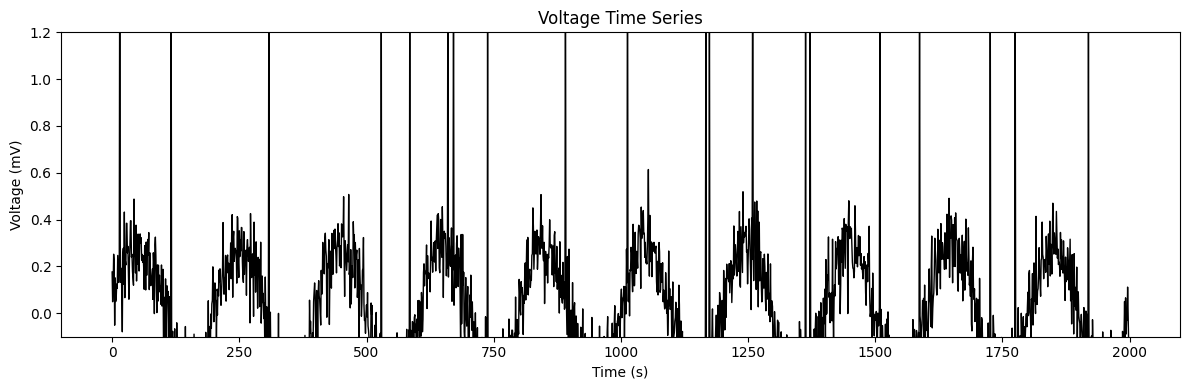

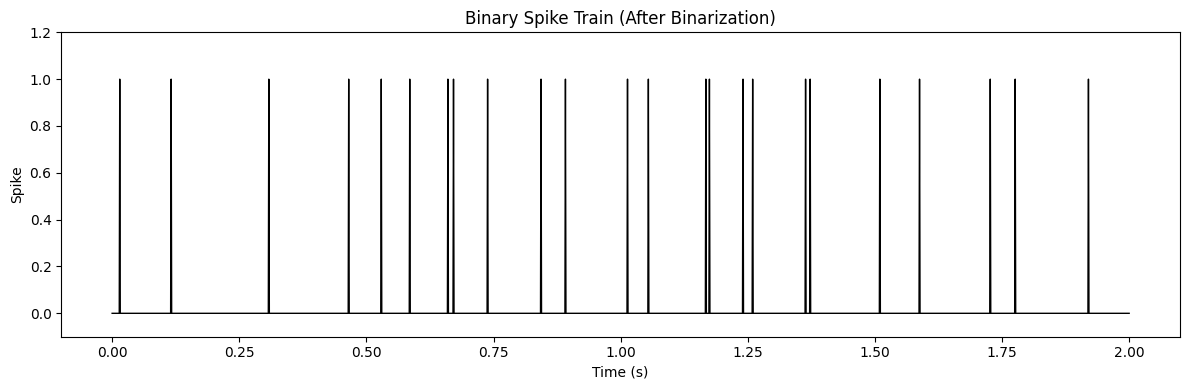

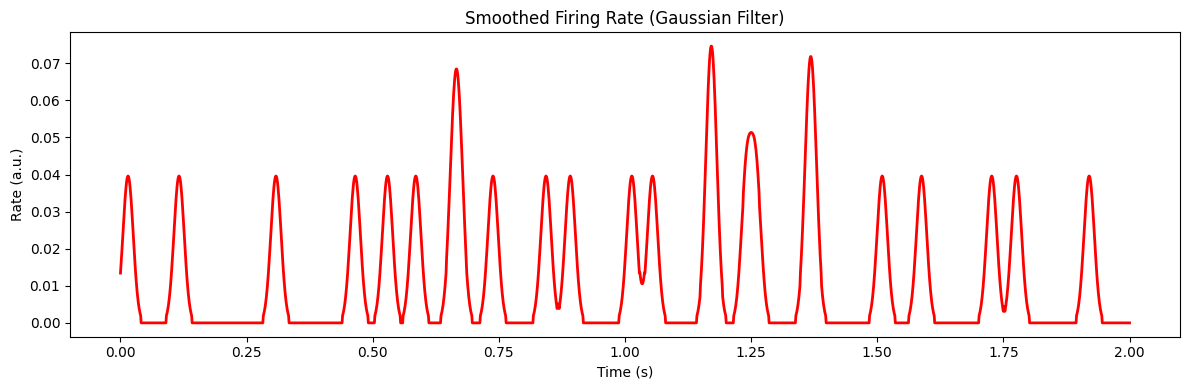

In [ ]:
# ===== Generate random voltage time series =====
np.random.seed(0)
sampling_freq = 1000  # Hz
duration = 2.0        # seconds
t = np.linspace(0, duration, int(duration * sampling_freq))

# A noisy subthreshold membrane voltage with occasional spikes
signal = 0.3 * np.sin(2*np.pi*5*t) + 0.1*np.random.randn(len(t))
signal[np.random.choice(len(t), 20, replace=False)] += 1.5  # add artificial spikes

# ===== Step 1: Binarize (spike detection) =====
threshold = 0.5
spikes = binarize(signal, threshold)

# ===== Step 2: Smooth spike train to get firing rate =====
firing_rate = smooth(spikes, win_size=0.05, sampling_freq=sampling_freq)

# ===== Plot 0: Voltage time series =====
plt.figure(figsize=(12,4))
plt.plot(signal, color='black', linewidth=1)
plt.title("Voltage Time Series")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.ylim(-0.1, 1.2)
plt.tight_layout()
plt.show()

# ===== Plot 1: Binary spike train =====
plt.figure(figsize=(12,4))
plt.plot(t, spikes, color='black', linewidth=1)
plt.title("Binary Spike Train (After Binarization)")
plt.xlabel("Time (s)")
plt.ylabel("Spike")
plt.ylim(-0.1, 1.2)
plt.tight_layout()
plt.show()

# ===== Plot 2: Firing-rate estimate =====
plt.figure(figsize=(12,4))
plt.plot(t, firing_rate, color='red', linewidth=2)
plt.title("Smoothed Firing Rate (Gaussian Filter)")
plt.xlabel("Time (s)")
plt.ylabel("Rate (a.u.)")
plt.tight_layout()
plt.show()

In [ ]:
data_path = r'data/FirstExp-minusfivetofive-420REALREAL-FORREALTHISTIME2025-01-08T16_23_39.bin'
unpacked_data = np.fromfile(data_path, dtype=np.float64)
unpacked_data = unpacked_data.reshape(-1, 2)

EPhys = unpacked_data[:, 0]
TTL = unpacked_data[:, 1]

fs = 25000 # sampling frequency of 25kHz
cutoff = 200  # 200
order = 4
b, a = butter(order, cutoff / (fs/2), btype='low') # fs/2 is the Nyquist frequency; need to normalize cutoff frequency between 0 and 1
filtered_TTL = filtfilt(b, a, TTL)

start_index = fs * 10 * 60 
end_index = fs * 11 * 60 

filtered_TTL_segment 

df = pd.DataFrame({
    'EPhys': unpacked_data[:, 0],
    'TTL': unpacked_data[:, 1],
    'Filtered_TTL': filtered_TTL
})
df.head()




In [ ]:
# ===== Generate random voltage time series =====
np.random.seed(0)
sampling_freq = 1000  # Hz
duration = 2.0        # seconds
t = np.linspace(0, duration, int(duration * sampling_freq))

# A noisy subthreshold membrane voltage with occasional spikes
signal = 0.3 * np.sin(2*np.pi*5*t) + 0.1*np.random.randn(len(t))
signal[np.random.choice(len(t), 20, replace=False)] += 1.5  # add artificial spikes

# ===== Step 1: Binarize (spike detection) =====
threshold = 0.5
spikes = binarize(signal, threshold)

# ===== Step 2: Smooth spike train to get firing rate =====
firing_rate = smooth(spikes, win_size=0.05, sampling_freq=sampling_freq)

# ===== Plot 0: Voltage time series =====
plt.figure(figsize=(12,4))
plt.plot(signal, color='black', linewidth=1)
plt.title("Voltage Time Series")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.ylim(-0.1, 1.2)
plt.tight_layout()
plt.show()

# ===== Plot 1: Binary spike train =====
plt.figure(figsize=(12,4))
plt.plot(t, spikes, color='black', linewidth=1)
plt.title("Binary Spike Train (After Binarization)")
plt.xlabel("Time (s)")
plt.ylabel("Spike")
plt.ylim(-0.1, 1.2)
plt.tight_layout()
plt.show()

# ===== Plot 2: Firing-rate estimate =====
plt.figure(figsize=(12,4))
plt.plot(t, firing_rate, color='red', linewidth=2)
plt.title("Smoothed Firing Rate (Gaussian Filter)")
plt.xlabel("Time (s)")
plt.ylabel("Rate (a.u.)")
plt.tight_layout()
plt.show()

# Figure #1